In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
import warnings
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
df = pd.read_excel('Data_Full.xlsx')

In [3]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,planet_star_ratio
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160,2.437972
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450,3.052859
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074,16.820276
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076,42.300885
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200,2.629063


In [4]:
df_new = df.copy()

In [5]:
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(non_numeric_cols)

['kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat', 'koi_vet_date', 'koi_pdisposition', 'koi_disp_prov', 'koi_comment', 'koi_fittype', 'koi_limbdark_mod', 'koi_parm_prov', 'koi_tce_delivname', 'koi_quarters', 'koi_trans_mod', 'koi_datalink_dvr', 'koi_datalink_dvs', 'koi_sparprov']


In [6]:
df_new = df_new.drop(columns=[col for col in df_new.columns if 'id' in col.lower() or 'name' in col.lower() or 'date' in col.lower()])

In [7]:
non_numeric_cols = df_new.select_dtypes(exclude=[np.number]).columns.tolist()
print(non_numeric_cols)

['koi_disposition', 'koi_vet_stat', 'koi_pdisposition', 'koi_disp_prov', 'koi_comment', 'koi_fittype', 'koi_limbdark_mod', 'koi_parm_prov', 'koi_quarters', 'koi_trans_mod', 'koi_datalink_dvr', 'koi_datalink_dvs', 'koi_sparprov']


In [8]:
df_new[non_numeric_cols].head()

,koi_disposition,koi_vet_stat,koi_pdisposition,koi_disp_prov,koi_comment,koi_fittype,koi_limbdark_mod,koi_parm_prov,koi_quarters,koi_trans_mod,koi_datalink_dvr,koi_datalink_dvs,koi_sparprov
0,CONFIRMED,Done,CANDIDATE,q1_q17_dr25_sup_koi,NO_COMMENT,LS+MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr25_koi,11111100000000000597806901362688,Mandel and Agol (2002 ApJ 580 171),010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,q1_q17_dr25_stellar
1,CONFIRMED,Done,CANDIDATE,q1_q17_dr25_sup_koi,NO_COMMENT,LS+MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr25_koi,11111100000000000597806901362688,Mandel and Agol (2002 ApJ 580 171),010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,q1_q17_dr25_stellar
2,CANDIDATE,Done,CANDIDATE,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,LS+MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr25_koi,11111100000000000597806901362688,Mandel and Agol (2002 ApJ 580 171),010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,q1_q17_dr25_stellar
3,FALSE POSITIVE,Done,FALSE POSITIVE,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,LS+MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr25_koi,11111100000000000597806901362688,Mandel and Agol (2002 ApJ 580 171),010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,q1_q17_dr25_stellar
4,CONFIRMED,Done,CANDIDATE,q1_q17_dr25_sup_koi,NO_COMMENT,LS+MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr25_koi,1111109999999999975338197123072,Mandel and Agol (2002 ApJ 580 171),010/010854/010854555/dv/kplr010854555-20160209...,010/010854/010854555/dv/kplr010854555-001-2016...,q1_q17_dr25_stellar


In [9]:
df_new = df_new.drop(columns=[col for col in non_numeric_cols if col != 'koi_disposition'])

In [10]:
non_numeric_cols = df_new.select_dtypes(exclude=[np.number]).columns.tolist()
print(non_numeric_cols)

['koi_disposition']


In [11]:
df_new.head()

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,planet_star_ratio
0,CONFIRMED,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,...,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160,2.437972
1,CONFIRMED,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,...,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450,3.052859
2,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,...,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074,16.820276
3,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,...,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076,42.300885
4,CONFIRMED,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,...,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200,2.629063


In [12]:
import joblib

# Encode 'koi_disposition' and show mapping
le = LabelEncoder()
df_new['koi_disposition_encoded'] = le.fit_transform(df_new['koi_disposition'])

# Display mapping of old values to encoded values
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Encoding mapping:", mapping)


Encoding mapping: {'CANDIDATE': np.int64(0), 'CONFIRMED': np.int64(1), 'FALSE POSITIVE': np.int64(2)}


In [13]:
null_counts = df_new.isnull().sum()
nan_counts = df_new.isna().sum()

print("Null counts per column:\n", null_counts)
print("\nNaN counts per column:\n", nan_counts)

Null counts per column:
 koi_disposition               0
koi_score                  1510
koi_fpflag_nt                 0
koi_fpflag_ss                 0
koi_fpflag_co                 0
                           ... 
koi_dikco_mdec_err          570
koi_dikco_msky              570
koi_dikco_msky_err          570
planet_star_ratio           363
koi_disposition_encoded       0
Length: 106, dtype: int64

NaN counts per column:
 koi_disposition               0
koi_score                  1510
koi_fpflag_nt                 0
koi_fpflag_ss                 0
koi_fpflag_co                 0
                           ... 
koi_dikco_mdec_err          570
koi_dikco_msky              570
koi_dikco_msky_err          570
planet_star_ratio           363
koi_disposition_encoded       0
Length: 106, dtype: int64


In [14]:
# Fill numerical columns with median
numeric_cols = df_new.select_dtypes(include=[np.number]).columns.tolist()
df_new[numeric_cols] = df_new[numeric_cols].fillna(df_new[numeric_cols].median())

# Fill 'koi_disposition' with mode
df_new['koi_disposition'] = df_new['koi_disposition'].fillna(df_new['koi_disposition'].mode()[0])


In [15]:
null_counts = df_new.isnull().sum()
nan_counts = df_new.isna().sum()

print("Null counts per column:\n", null_counts)
print("\nNaN counts per column:\n", nan_counts)

Null counts per column:
 koi_disposition            0
koi_score                  0
koi_fpflag_nt              0
koi_fpflag_ss              0
koi_fpflag_co              0
                          ..
koi_dikco_mdec_err         0
koi_dikco_msky             0
koi_dikco_msky_err         0
planet_star_ratio          0
koi_disposition_encoded    0
Length: 106, dtype: int64

NaN counts per column:
 koi_disposition            0
koi_score                  0
koi_fpflag_nt              0
koi_fpflag_ss              0
koi_fpflag_co              0
                          ..
koi_dikco_mdec_err         0
koi_dikco_msky             0
koi_dikco_msky_err         0
planet_star_ratio          0
koi_disposition_encoded    0
Length: 106, dtype: int64


In [21]:
df_new.to_csv('df_new.csv', index=False)
print("df_new saved to 'df_new.csv'")

df_new saved to 'df_new.csv'


In [16]:
# train test split
X = df_new.drop(columns=['koi_disposition', 'koi_disposition_encoded'])
y = df_new['koi_disposition_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (6694, 104), (6694,)
Testing set shape: (2870, 104), (2870,)


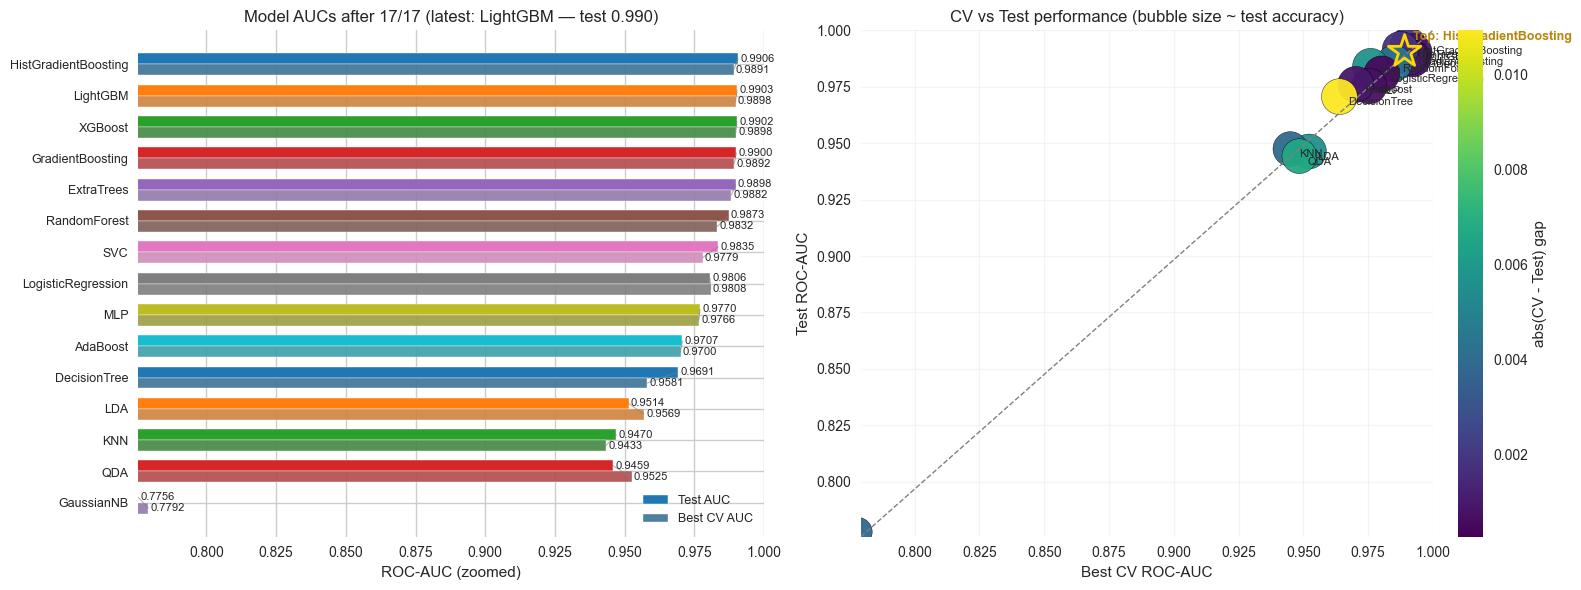

,rank_test_score,mean_test_score,std_test_score,params
0,1,0.989763,0.001046,"{'feature_fraction': 0.7123620356542087, 'lear..."
5,2,0.989582,0.001034,"{'feature_fraction': 0.7852444528883149, 'lear..."
6,3,0.989389,0.001221,"{'feature_fraction': 0.6873687420594126, 'lear..."
2,4,0.989296,0.001144,"{'feature_fraction': 0.6174250836504598, 'lear..."
10,5,0.989227,0.001232,"{'feature_fraction': 0.884665661176, 'learning..."
8,6,0.989085,0.001281,"{'feature_fraction': 0.7542703315240835, 'lear..."


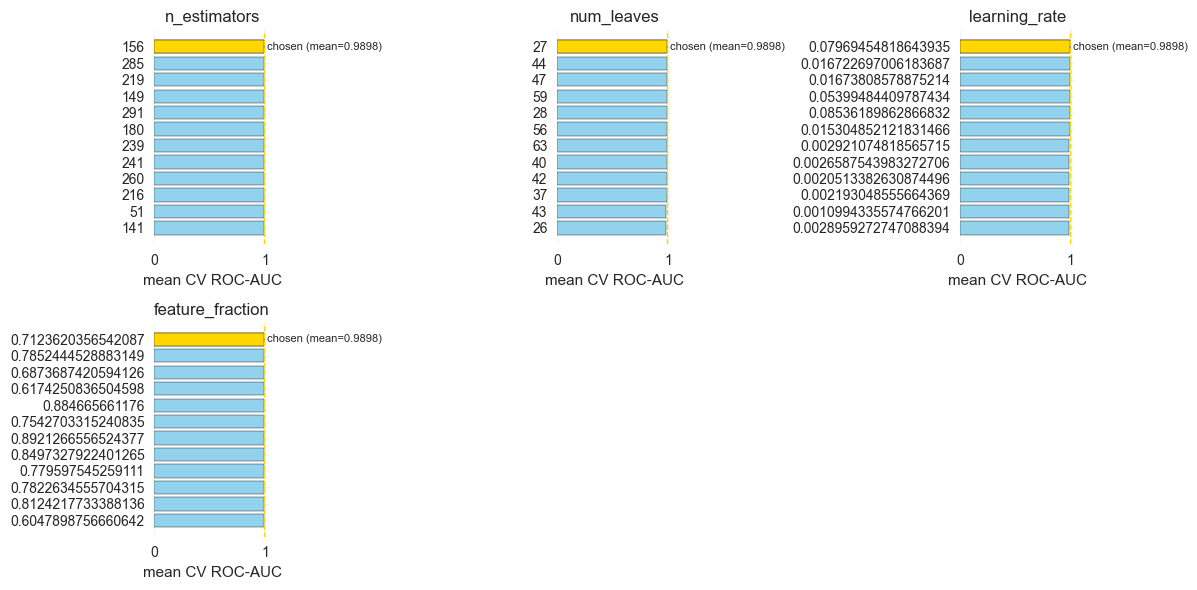

n_estimators: chosen=156 (mean CV 0.9898)
num_leaves: chosen=27 (mean CV 0.9898)
learning_rate: chosen=0.07969454818643935 (mean CV 0.9898)
feature_fraction: chosen=0.7123620356542087 (mean CV 0.9898)

Completed: LightGBM (17/17)
 best CV ROC-AUC: 0.9898
 test recall (macro): 0.9242
 test ROC-AUC: 0.9903  test accuracy: 0.9449

 Top feature importances (current model):


koi_score          322
koi_max_mult_ev    317
dec                303
koi_count          301
koi_fpflag_nt      297
koi_duration       247
koi_fpflag_co      245
koi_fpflag_ss      238
ra                 232
koi_dicco_msky     228
dtype: int32

,model,best_cv_score,test_auc,test_accuracy,best_params
0,HistGradientBoosting,0.989076,0.990613,0.944599,"{'learning_rate': 0.029106359131330698, 'max_d..."
1,LightGBM,0.989763,0.990287,0.944948,"{'feature_fraction': 0.7123620356542087, 'lear..."
2,XGBoost,0.989820,0.990188,0.944251,"{'colsample_bytree': 0.6174250836504598, 'lear..."
3,GradientBoosting,0.989246,0.990032,0.941463,"{'learning_rate': 0.037183641805732096, 'max_d..."
4,ExtraTrees,0.988235,0.989807,0.940418,"{'max_depth': None, 'max_features': None, 'n_e..."
5,RandomForest,0.983158,0.987295,0.939024,"{'max_depth': None, 'max_features': None, 'min..."
6,SVC,0.977884,0.983500,0.925436,"{'clf__C': 85.68869785189007, 'clf__degree': 2..."
7,LogisticRegression,0.980827,0.980568,0.925436,"{'clf__C': 659.871107205407, 'clf__penalty': '..."
8,MLP,0.976557,0.976986,0.904530,"{'clf__learning_rate_init': 0.0001, 'clf__hidd..."
9,AdaBoost,0.970008,0.970702,0.919164,"{'learning_rate': 0.6111150117432088, 'n_estim..."



Best model: HistGradientBoosting
CV ROC-AUC (best): 0.9890755468666823
Test ROC-AUC: 0.9906126345749969
Test recall (macro): 0.9239951490981205
Test accuracy: 0.9445993031358885

Classification report on test set:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       594
           1       0.90      0.93      0.92       824
           2       0.99      0.99      0.99      1452

    accuracy                           0.94      2870
   macro avg       0.93      0.92      0.93      2870
weighted avg       0.94      0.94      0.94      2870



In [17]:
import traceback
from sklearn.pipeline import Pipeline
from scipy.stats import randint as sp_randint, uniform as sp_uniform, loguniform as sp_loguniform

# model structure + live "why this param" inspection
candidates = {
    "LogisticRegression": (
        Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(solver="liblinear", max_iter=500, multi_class="ovr"))]),
        {
            "clf__C": sp_loguniform(1e-3, 1e3), 
            "clf__penalty": ["l2"],
        },
    ),
    "SVC": (
        Pipeline([("scaler", StandardScaler()), ("clf", SVC(probability=True))]),
        {
        "clf__C": sp_loguniform(1e-2, 1e2),
        "clf__gamma": ["scale", "auto", 0.001, 0.01, 0.1],  # ✅ no mixing with dist
        "clf__kernel": ["rbf", "linear", "poly"],
        "clf__degree": [2, 3],  
        },
    ),

    "KNN": (
        Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier())]),
        {
            "clf__n_neighbors": sp_randint(1, 21),  
            "clf__weights": ["uniform", "distance"],
            "clf__p": [1, 2],
        },
    ),
    "GaussianNB": (GaussianNB(), {}),
    "LDA": (LinearDiscriminantAnalysis(), {}),
    "QDA": (QuadraticDiscriminantAnalysis(), {}),
    "DecisionTree": (
        DecisionTreeClassifier(random_state=42),
        {
            "max_depth": [3, 5, 10],  
            "min_samples_split": sp_randint(2, 11),
            "max_features": [None, "sqrt"],
        },
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),  
            "max_depth": [None, 10, 20],
            "min_samples_split": sp_randint(2, 11),
            "max_features": ["sqrt", None],
        },
    ),
    "ExtraTrees": (
        ExtraTreesClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "max_depth": [None, 10, 20],
            "max_features": ["sqrt", None],
        },
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {
            "n_estimators": sp_randint(50, 201),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "max_depth": sp_randint(3, 8),
            "subsample": sp_uniform(0.6, 0.3),
        },
    ),
    "HistGradientBoosting": (
        HistGradientBoostingClassifier(random_state=42),
        {
            "max_iter": sp_randint(100, 201),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "max_depth": [None, 3, 5],
        },
    ),
    "AdaBoost": (
        AdaBoostClassifier(random_state=42),
        {
            "n_estimators": sp_randint(50, 201),
            "learning_rate": sp_uniform(0.01, 1.0),
        },
    ),
    "MLP": (
        Pipeline([("scaler", StandardScaler()), ("clf", MLPClassifier(max_iter=500, random_state=42))]),
        {
            "clf__hidden_layer_sizes": [(50,), (100,), (50, 50)],
            "clf__alpha": [1e-5, 1e-4, 1e-3],
            "clf__learning_rate_init": [1e-4, 1e-3],
        },
    ),
    "SGD": (
        Pipeline([("scaler", StandardScaler()), ("clf", SGDClassifier(loss="log_loss", max_iter=2000, tol=1e-3, random_state=42))]),
        {
            "clf__alpha": sp_loguniform(1e-5, 1e-2),
            "clf__penalty": ["l2", "l1", "elasticnet", "none"],
            "clf__l1_ratio": sp_uniform(0.0, 1.0),
        },
    ),
    "CalibratedSVC": (
        Pipeline([("scaler", StandardScaler()), ("base", SVC(probability=False))]),
        {
            "base__C": sp_loguniform(1e-2, 1e1),
            "base__kernel": ["linear", "rbf"],
            "base__gamma": ["scale", "auto", sp_loguniform(1e-3, 1e-2)],
        },
    ),
}

# optional: XGBoost / LightGBM
try:
    candidates["XGBoost"] = (
        XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "max_depth": sp_randint(3, 8),
            "learning_rate": sp_loguniform(1e-3, 1e-1), 
            "colsample_bytree": sp_uniform(0.6, 0.3),
        },
    )
except Exception:
    pass

try:
    candidates["LightGBM"] = (
        LGBMClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "num_leaves": sp_randint(20, 64),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "feature_fraction": sp_uniform(0.6, 0.3),
        },
    )
except Exception:
    pass

results = []
n_iter = 12
cv = 3
scoring = "roc_auc_ovr"   # 👈 IMPORTANT: tells sklearn it's multiclass
random_state = 42

def extract_inner(est):
    if isinstance(est, Pipeline):
        return est.named_steps[list(est.named_steps)[-1]]
    return est


sns.set_style("whitegrid")
plt.ioff()
rng = np.random.RandomState(random_state)

for i, (name, (estimator, param_dist)) in enumerate(candidates.items(), 1):
    if param_dist:
        try:
            max_choices = max(1, sum(len(v) for v in param_dist.values()))
        except Exception:
            max_choices = n_iter
    else:
        max_choices = 1

    rs = RandomizedSearchCV(
        estimator,
        param_distributions=param_dist,
        n_iter=min(n_iter, max_choices),
        scoring=scoring,   # 👈 now using multiclass-safe scorer
        cv=cv,
        n_jobs=-1,
        verbose=0,
        random_state=random_state,
        refit=True,
    )

    rs.error_score = "raise"
    try:
        rs.fit(X_train, y_train)
    except Exception as e:
        print(f"RandomizedSearchCV failed for {name}: {e}")
        traceback.print_exc()
        continue

    best = rs.best_estimator_
    y_pred = best.predict(X_test)

    # ✅ multiclass ROC-AUC handling
    if hasattr(best, "predict_proba"):
        y_proba = best.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    elif hasattr(best, "decision_function"):
        y_scores = best.decision_function(X_test)
        test_auc = roc_auc_score(y_test, y_scores, multi_class="ovr")
    else:
        y_proba = None
        test_auc = accuracy_score(y_test, y_pred)  # fallback

    test_acc = accuracy_score(y_test, y_pred)

    results.append(
        {
            "model": name,
            "best_cv_score": rs.best_score_,
            "best_params": rs.best_params_,
            "test_auc": test_auc,
            "test_accuracy": test_acc,
            "estimator": best,
            "cv_std": np.mean(rs.cv_results_["std_test_score"]) if hasattr(rs, "cv_results_") else 0.0,
        }
    )

    cur_df = pd.DataFrame(results).sort_values("test_auc", ascending=False).reset_index(drop=True)

    # nicer live plot (main comparison)
    clear_output(wait=True)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    palette = sns.color_palette("tab10", n_colors=len(cur_df))
    axes[0].set_title(f"Model AUCs after {i}/{len(candidates)} (latest: {name} — test {test_auc:.3f})")
    indices = np.arange(len(cur_df))
    height = 0.35

    axes[0].barh(indices - height/2, cur_df["test_auc"], height=height, color=palette, label="Test AUC")
    axes[0].barh(indices + height/2, cur_df["best_cv_score"], height=height, color=[sns.desaturate(c, 0.6) for c in palette], alpha=0.9, label="Best CV AUC")
    axes[0].set_yticks(indices)
    axes[0].set_yticklabels(cur_df["model"], fontsize=9)
    axes[0].invert_yaxis()
    axes[0].set_xlim(min(cur_df["test_auc"].min(), cur_df["best_cv_score"].min()), 1.00)
    axes[0].set_xlabel("ROC-AUC (zoomed)")
    axes[0].legend(fontsize=9)
    for idx in range(len(cur_df)):
        axes[0].text(cur_df.loc[idx, "test_auc"] + 0.0008, idx - height/2, f"{cur_df.loc[idx,'test_auc']:.4f}", va="center", fontsize=8)
        axes[0].text(cur_df.loc[idx, "best_cv_score"] + 0.0008, idx + height/2, f"{cur_df.loc[idx,'best_cv_score']:.4f}", va="center", fontsize=8)
        axes[0].plot([cur_df.loc[idx, "best_cv_score"], cur_df.loc[idx, "test_auc"]], [idx + height/2, idx - height/2], color="gray", linewidth=0.8, alpha=0.6)

    # scatter CV vs Test (bubble = accuracy)
    axes[1].set_title("CV vs Test performance (bubble size ~ test accuracy)")
    x = cur_df["best_cv_score"].values
    y = cur_df["test_auc"].values
    jitter_scale = 0.0025
    x_j = x + rng.normal(scale=jitter_scale, size=len(x))
    y_j = y + rng.normal(scale=jitter_scale, size=len(y))
    sizes = 120 + 600 * cur_df["test_accuracy"].values
    gap = np.abs(cur_df["best_cv_score"] - cur_df["test_auc"]).values
    cmap = plt.cm.get_cmap("viridis")
    colors = cmap(np.clip(gap / (gap.max() + 1e-6), 0, 1))

    sc = axes[1].scatter(x_j, y_j, s=sizes, c=colors, edgecolor="k", alpha=0.95)
    axes[1].plot([min(x), 1.0], [min(y), 1.0], ls="--", color="gray", linewidth=1)
    for j, row in cur_df.iterrows():
        axes[1].annotate(row["model"], (x_j[j], y_j[j]), xytext=(6, -6), textcoords="offset points", fontsize=8)
    if not cur_df.empty:
        top = cur_df.iloc[0]
        axes[1].scatter([top["best_cv_score"]], [top["test_auc"]], s=600, facecolors="none", edgecolors="gold", linewidths=2, marker="*", zorder=10)
        axes[1].annotate(f"Top: {top['model']}", (top["best_cv_score"], top["test_auc"]), xytext=(6, 8), textcoords="offset points", fontsize=9, weight="bold", color="darkgoldenrod")

    axes[1].set_xlabel("Best CV ROC-AUC")
    axes[1].set_ylabel("Test ROC-AUC")
    axes[1].set_xlim(min(x), 1.00)
    axes[1].set_ylim(min(y), 1.00)
    axes[1].grid(alpha=0.2)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gap.min(), vmax=gap.max()))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label("abs(CV - Test) gap")

    plt.tight_layout()
    display(fig)
    plt.close(fig)

    # Show the "self-learning" details: what the search evaluated and why it was chosen
    df_cv = pd.DataFrame(rs.cv_results_)
    display(df_cv.sort_values("rank_test_score").head(6)[["rank_test_score", "mean_test_score", "std_test_score", "params"]])

    # plot aggregated effect for each hyperparameter we searched
    if param_dist:
        # small grid of plots (one per hyperparameter)
        keys = list(param_dist.keys())
        n_plots = len(keys)
        ncols = min(3, n_plots) if n_plots else 1
        nrows = int(np.ceil(n_plots / ncols)) if n_plots else 1
        fig2, axs2 = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * max(1, nrows)))
        axs2 = np.array(axs2).reshape(-1) if n_plots > 1 else [axs2]  # flat list
        for ax_idx, p in enumerate(keys):
            axp = axs2[ax_idx]
            col = f"param_{p}"
            if col in df_cv:
                # aggregate mean score per value
                agg = df_cv.groupby(col)["mean_test_score"].agg(["mean", "std"]).sort_values("mean", ascending=True)
                # convert index to string for plotting clarity
                agg_idx = agg.index.astype(str)
                axp.barh(agg_idx, agg["mean"], xerr=agg["std"], color="skyblue", edgecolor="k", alpha=0.9)
                axp.set_title(p)
                axp.set_xlabel("mean CV ROC-AUC")
                # annotate chosen
                chosen_val = rs.best_params_.get(p, None)
                if chosen_val is not None:
                    axp.axvline(rs.best_score_, color="gold", linestyle="--", linewidth=1)
                    # try to highlight chosen entry
                    try:
                        match_mask = agg.index.astype(str) == str(chosen_val)
                        if match_mask.any():
                            matched_idx = agg.index[match_mask][0]
                            chosen_mean = agg.loc[matched_idx, "mean"]
                            axp.barh(str(matched_idx), chosen_mean, color="gold", edgecolor="k")
                            axp.text(chosen_mean + 1e-4, list(match_mask).index(True), f" chosen (mean={chosen_mean:.4f})", va="center", fontsize=8)
                    except Exception:
                        pass
            else:
                axp.text(0.5, 0.5, "no data", ha="center")
            axp.grid(alpha=0.2)
        # hide unused axes
        for k in range(len(keys), len(axs2)):
            axs2[k].axis("off")
        plt.tight_layout()
        display(fig2)
        plt.close(fig2)

        # textual rationale per hyperparameter
        for p in keys:
            col = f"param_{p}"
            if col in df_cv:
                best_val = rs.best_params_.get(p, None)
                # mean score of chosen val
                sel_mean = df_cv[df_cv[col] == best_val]["mean_test_score"].mean() if best_val is not None else None
                print(f"{p}: chosen={best_val} (mean CV {sel_mean:.4f})" if sel_mean is not None else f"{p}: chosen={best_val}")
            else:
                print(f"{p}: (no per-value breakdown available)")

    # short model summary and feature importances
    print(f"\nCompleted: {name} ({i}/{len(candidates)})")
    print(" best CV ROC-AUC:", f"{rs.best_score_:.4f}")
    print(" test recall (macro):", f"{recall_score(y_test, y_pred, average='macro'):.4f}")
    print(" test ROC-AUC:", f"{test_auc:.4f}", " test accuracy:", f"{test_acc:.4f}")

    inner = extract_inner(best)
    if hasattr(inner, "feature_importances_"):
        importances = inner.feature_importances_
        feat_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
        print("\n Top feature importances (current model):")
        display(feat_series.head(10))

    time.sleep(0.15)

results_df = pd.DataFrame(results).sort_values("test_auc", ascending=False).reset_index(drop=True)
display(results_df[["model", "best_cv_score", "test_auc", "test_accuracy", "best_params"]])

best_row = results_df.loc[0]
best_model = best_row["estimator"]
print(f"\nBest model: {best_row['model']}")
print("CV ROC-AUC (best):", best_row["best_cv_score"])
print("Test ROC-AUC:", best_row["test_auc"])
print("Test recall (macro):", recall_score(y_test, best_model.predict(X_test), average='macro'))
print("Test accuracy:", best_row["test_accuracy"])
print("\nClassification report on test set:")
print(classification_report(y_test, best_model.predict(X_test)))

inner = extract_inner(best_model)
if hasattr(inner, "feature_importances_"):
    importances = inner.feature_importances_
    feat_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print("\nTop feature importances (best model):")
    display(feat_series.head(15))

best_estimator = best_model
results_summary = results_df


In [18]:
# Save the best model and results summary
joblib.dump(best_estimator, 'best_model.pkl')
results_summary.to_csv('model_results_summary.csv', index=False)

In [20]:
print("Best model saved to 'best_model.pkl'")

Best model saved to 'best_model.pkl'


In [ ]:
import pandas as pd
import joblib
# Load model 
model = joblib.load("best_model.pkl")   

# Load dataset to get features + label mapping
df = pd.read_csv("df_new.csv")

# Target column
target_col = "koi_disposition_encoded"
target_text_col = "koi_disposition"

# Features only (drop encoded + text labels if present)
X = df.drop(columns=[col for col in [target_col, target_text_col] if col in df.columns])

# Create mapping from encoded → original labels
if target_col in df.columns and target_text_col in df.columns:
    label_map = df[[target_col, target_text_col]].drop_duplicates().set_index(target_col)[target_text_col].to_dict()
else:
    label_map = None

# User input 
def get_user_input():
    print("\nEnter feature values (press Enter to use default from first row):")
    sample = X.iloc[0].copy()  # default template row
    for col in X.columns:
        val = input(f"{col} (default {sample[col]}): ")
        if val.strip():
            try:
                sample[col] = float(val)  # try numeric
            except ValueError:
                sample[col] = val  # keep as string if not numeric (left the decoded koi_disposition in the dataset)
    return sample

# Randomsss
def get_random_input():
    return X.sample(1).iloc[0]

# Choose mode 
mode = input("\nChoose input mode: (1) Manual entry, (2) Random row [default=2]: ") or "2"
if mode == "1":
    sample = get_user_input()
else:
    sample = get_random_input()

print("\nInput row used for prediction:\n", sample)

# Predict 
prediction = model.predict([sample])
proba = model.predict_proba([sample]) if hasattr(model, "predict_proba") else None

print("\nPrediction (encoded):", prediction[0])
if label_map:
    print("Prediction (label):", label_map[prediction[0]])

if proba is not None:
    print("\nProbabilities (per class):")
    for cls, p in zip(model.classes_, proba[0]):
        label = label_map.get(cls, cls) if label_map else cls
        print(f"  {cls} ({label}): {p:.4f}")



Input row used for prediction:
 koi_score             0.670000
koi_fpflag_nt         0.000000
koi_fpflag_ss         0.000000
koi_fpflag_co         0.000000
koi_fpflag_ec         0.000000
                        ...   
koi_dikco_mdec        0.050000
koi_dikco_mdec_err    0.300000
koi_dikco_msky        0.070000
koi_dikco_msky_err    0.340000
planet_star_ratio     3.642384
Name: 5153, Length: 104, dtype: float64

Prediction (encoded): 1
Prediction (label): CONFIRMED

Probabilities (per class):
  0 (CANDIDATE): 0.1486
  1 (CONFIRMED): 0.8381
  2 (FALSE POSITIVE): 0.0133


c:\Users\User\Documents\ECU\NTI AI STUFF\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\ECU\NTI AI STUFF\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
